## MATH 222 Final Project
### Preducting Price of Used Cars using Linear Regression

**Kaggle Dataset:** https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

#### Table Of Contents
1. Exploring the Data
2. Visualizing the Data
3. Cleaning the Data
4. Pre-processing the Data
5. Making the models
6. Testing the performance

**Note: This notebook was written in Google Colab, so it might not run correctly on local given the file and director paths**

In [1]:
!pip install category_encoders
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.3 MB/s eta 0:00:00


In [2]:
import os
import datetime
import re
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.linear_model import LinearRegression as LinearRegressionSciKit
import sklearn.metrics as skmetrics

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Mount drive to access csv files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Link director to data folder
data_folder = "/content/drive/MyDrive/Colab Notebooks/MATH 222: Linear Algebra/data"
contents = os.listdir(data_folder)
print(contents)

['used_cars.csv']


### Exploring Data

**Section Description:** Want to see shape, columns, features of dataset to get familiar

In [4]:
# read in data
used_cars_df = pd.read_csv(data_folder + '/used_cars.csv')

In [5]:
# analyze dataframe
used_cars_df.nunique()

brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [6]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [7]:
used_cars_df.head(n=10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
6,Audi,S3 2.0T Premium Plus,2017,"84,000 mi.",Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,"$31,000"
7,BMW,740 iL,2001,"242,000 mi.",Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,"$7,300"
8,Lexus,RC 350 F Sport,2021,"23,436 mi.",Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,"$41,927"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"


In [8]:
# number of (data points) rows and (features) columns
used_cars_df.shape

(4009, 12)

### Visualizing Data

**Section Description:** Want to visualize correlations between predictors and outcome variable (price) to see what X variables we should use. This will help us clean and pre-process the data down the road

In [9]:
numerical_features = ['milage', 'price', 'model_year']
categorical_features = ['brand', 'model', 'fuel_type', 'engine',
                       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

In [5]:
# plot numerical features
def plot_numer_features(df, numerical_features):
  plt.figure(figsize=(12, 6))
  for feature in numerical_features:
      plt.subplot(1, 3, numerical_features.index(feature) + 1)
      sns.histplot(data=df[feature], bins=20, kde=True)
      plt.xticks(rotation='vertical')
      plt.title(feature)
  plt.tight_layout()
  plt.show()


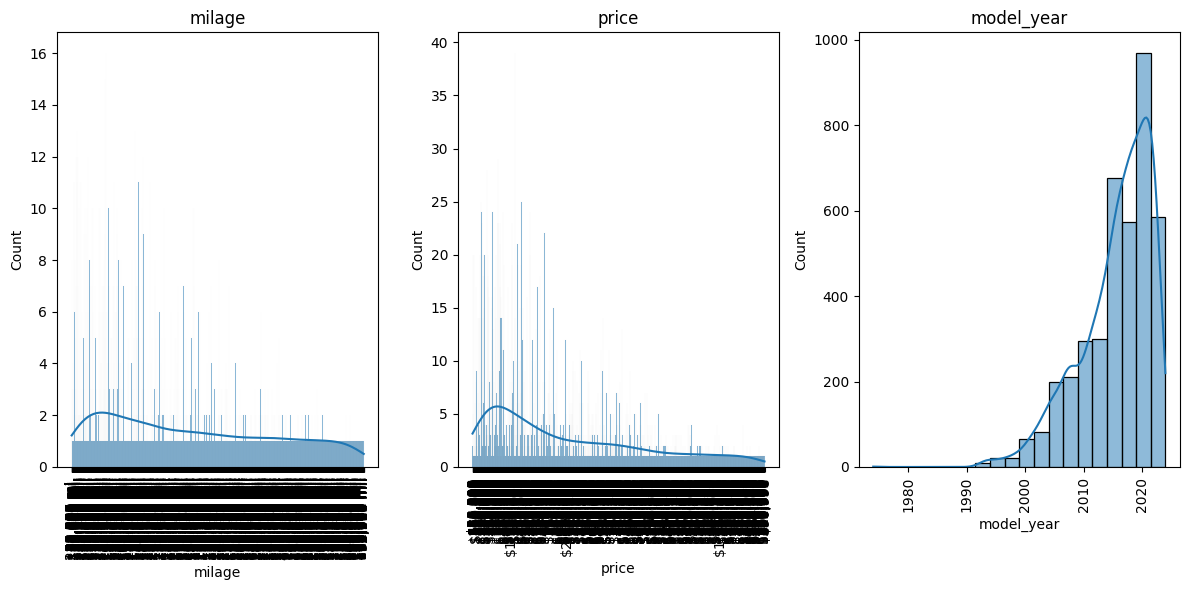

In [11]:
plot_numer_features(used_cars_df, numerical_features)

In [12]:
# print categorical features
# def print_cat_feat(df, categorical_features):
#   for column in df.columns:
#     unique_values = df[column].unique()
#     print(f"Unique values in '{column}': {unique_values}")
#     print()

# print_cat_feat(used_cars_df, categorical_features)

# plot catgorical features
def plot_cat_feat(df, categorical_features, keep, nrow, ncol):
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15, nrow * 7))
    axes = axes.ravel()  # flatten the array of axes

    for i, column in enumerate(categorical_features):
        # only keep top 'keep' categories to reduce size
        series_copy = df[column].copy()
        top = series_copy.value_counts().nlargest(keep).index
        series_copy[~series_copy.isin(top)] = 'Other'

        sns.countplot(x=series_copy, data=df, palette='Blues_d', ax=axes[i], saturation=0.8, order=series_copy.value_counts().index)
        for container in axes[i].containers:
            axes[i].bar_label(container, color='black', size=keep+1)
        axes[i].set_title(f'Count Plot of {column.capitalize()}')
        axes[i].set_xlabel(column.capitalize())
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
        axes[i].set_ylabel('Count')

        # hide any unused axes
        if i >= len(categorical_features) - 1:
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')

    plt.tight_layout(pad=2.0)
    plt.show()


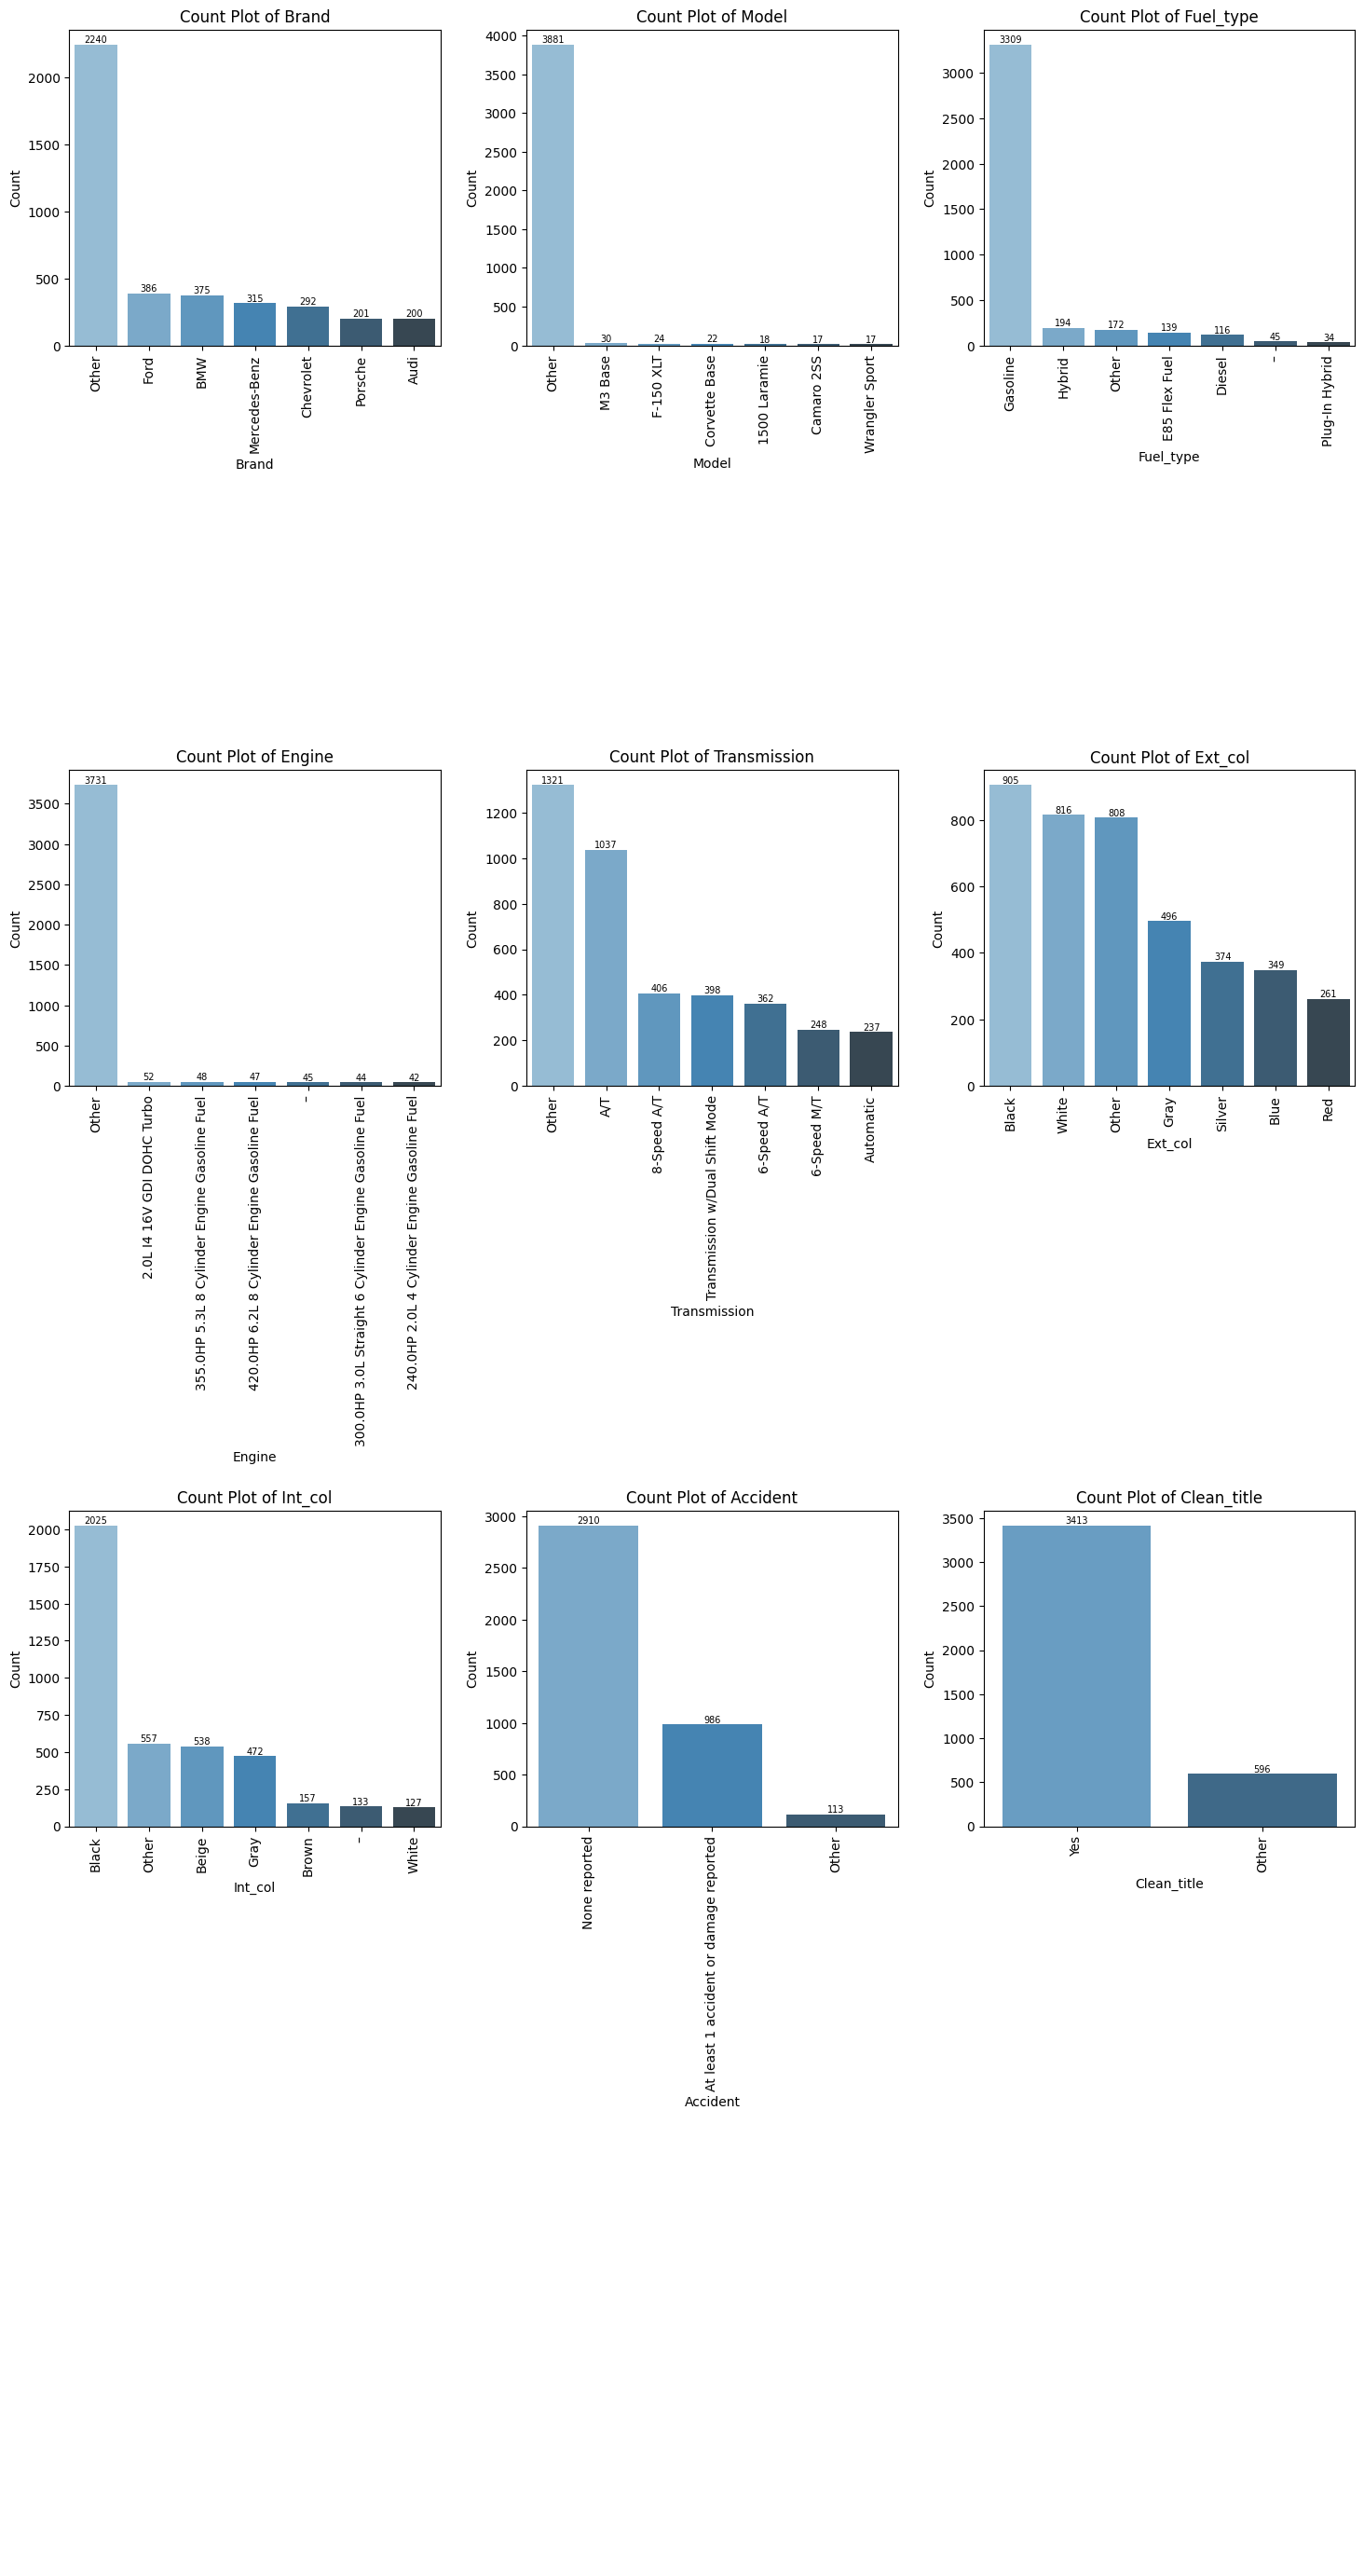

In [13]:
# plot categorical features
plot_cat_feat(used_cars_df, categorical_features, 6, 4, 3)

In [16]:
# plotting price vs X variables to see any correlation
def plot_vs_price(df, column, price_column):
    sns.set_theme(style="whitegrid")

    # Check if the column is numerical or categorical
    if df[column].dtype in ['int64', 'float64']: #and len(df[column].unique()) > 10:
        # for numerical columns, use scatterplot
        plt.figure(figsize=(10, 6))
        sns.regplot(x=column, y=price_column, data=df, scatter_kws={'alpha':0.5})
        plt.title(f'{column.capitalize()} vs {price_column.capitalize()}')
        plt.xticks(rotation=45)
    else:
        # for categorical columns, use boxplot
        plt.figure(figsize=(10, 6))
        if len(df[column].unique()) > 15:
            # if too many categories, show the top 15 only
            top_categories = df[column].value_counts().index[:15]
            data = df[df[column].isin(top_categories)]
            sns.boxplot(x=column, y=price_column, data=data)
            plt.xticks(rotation=45)
        else:
            sns.boxplot(x=column, y=price_column, data=df)
            plt.xticks(rotation=45)
        plt.title(f'{price_column.capitalize()} by {column.capitalize()}')

    plt.tight_layout()
    plt.show()

### Data Cleaning

**Section Description:** Want to remove/replace null values for proper regression analysis. Also want to break apart some columns into different numerical columns. Also want to drop columns that will not be useful in regression.

In [7]:
# modify miles and price values so that they are floats
used_cars_df['milage'] = used_cars_df['milage'].replace({',': '', ' mi': ''}, regex=True).astype(float)
used_cars_df['price'] = used_cars_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
used_cars_df.head(n=10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0
5,Acura,ILX 2.4L,2016,136397.0,Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,14798.0
6,Audi,S3 2.0T Premium Plus,2017,84000.0,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,Yes,31000.0
7,BMW,740 iL,2001,242000.0,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,Green,None reported,Yes,7300.0
8,Lexus,RC 350 F Sport,2021,23436.0,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,Yes,41927.0
9,Tesla,Model X Long Range Plus,2020,34000.0,NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,69950.0


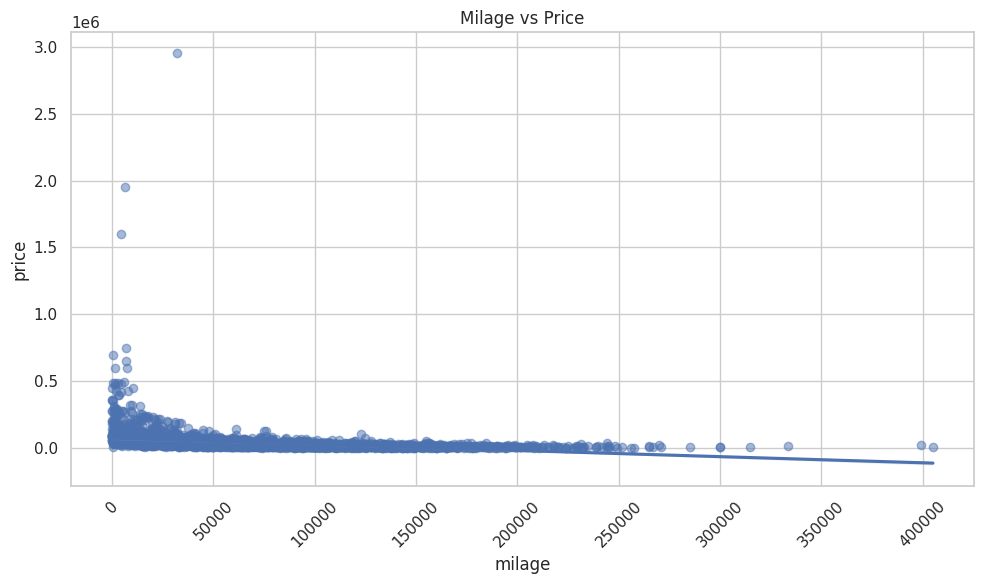

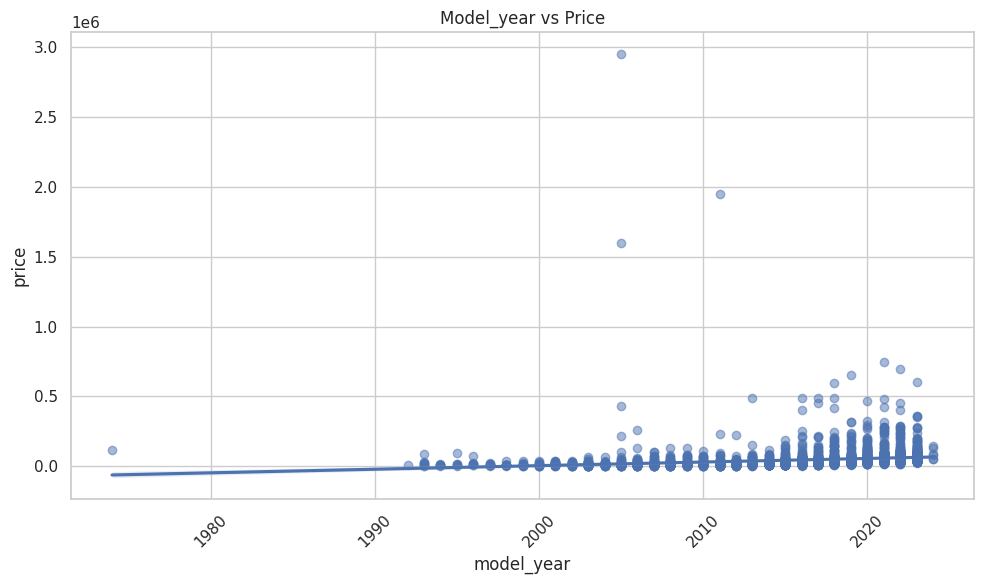

In [16]:
# visualize any correlation with numerical categories
for feature in numerical_features:
  if feature != 'price':
    plot_vs_price(used_cars_df, feature, 'price')

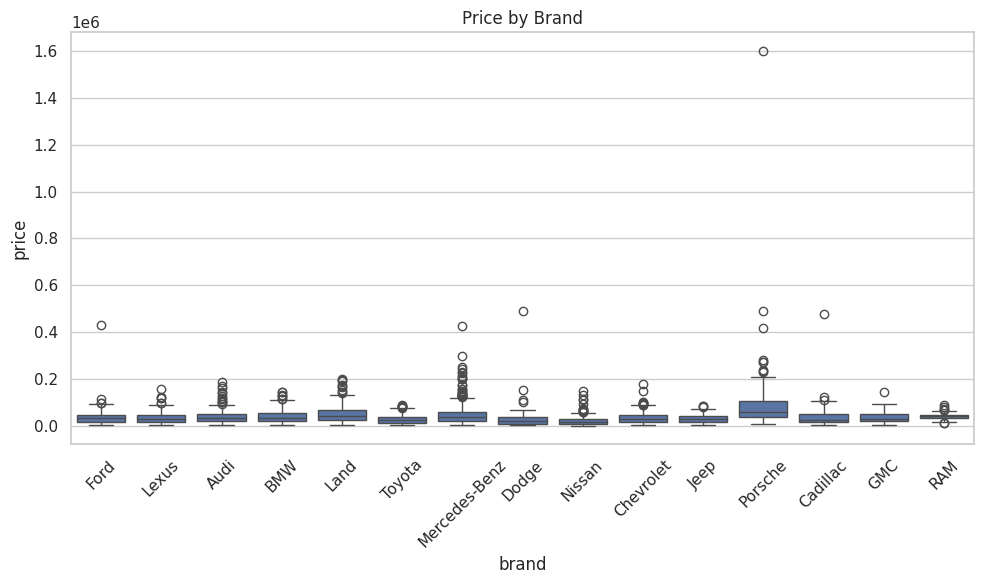

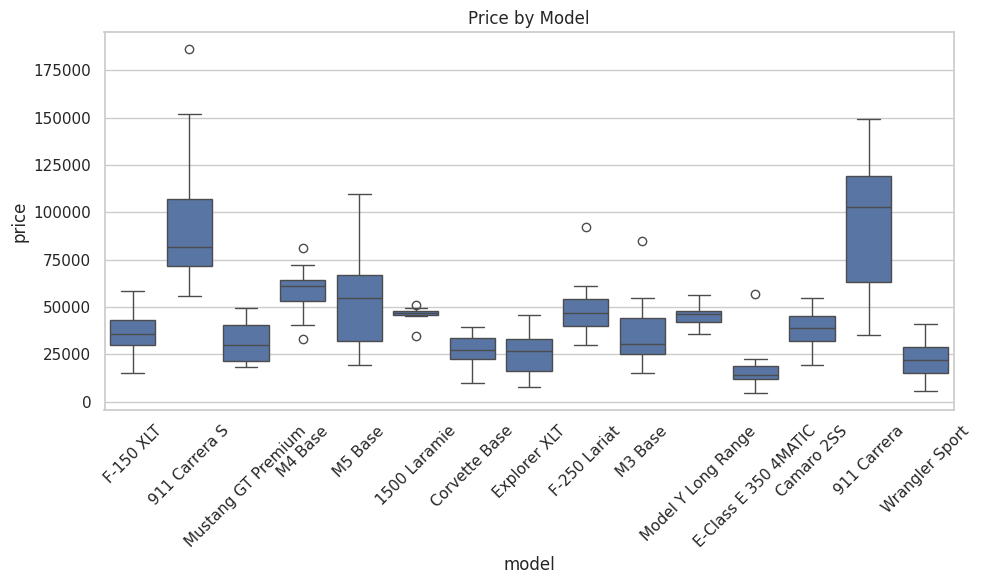

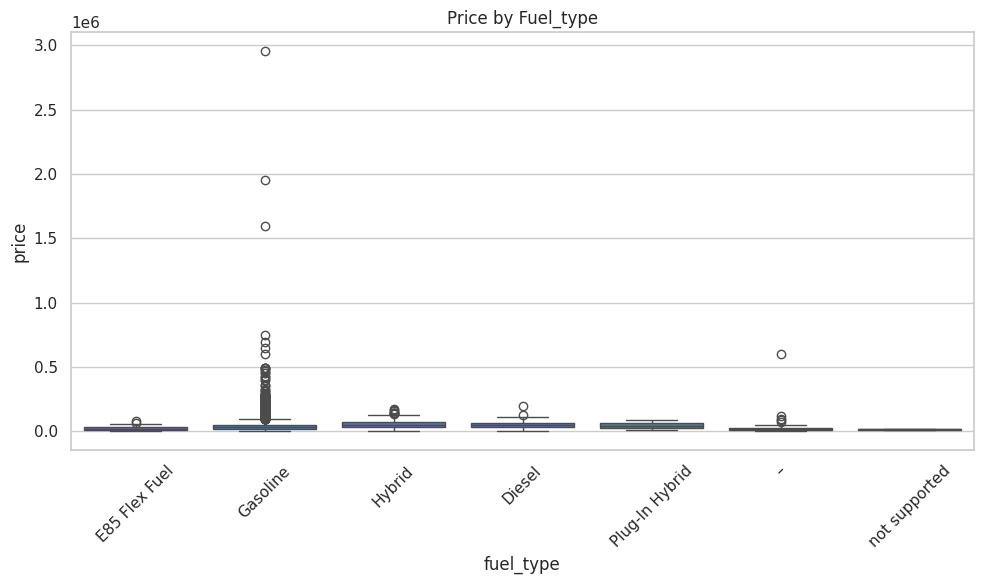

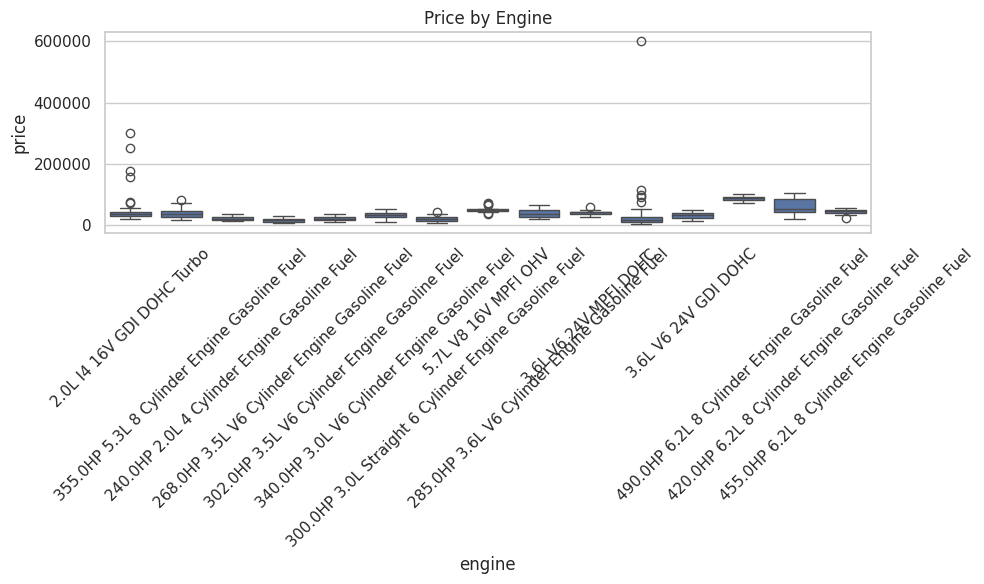

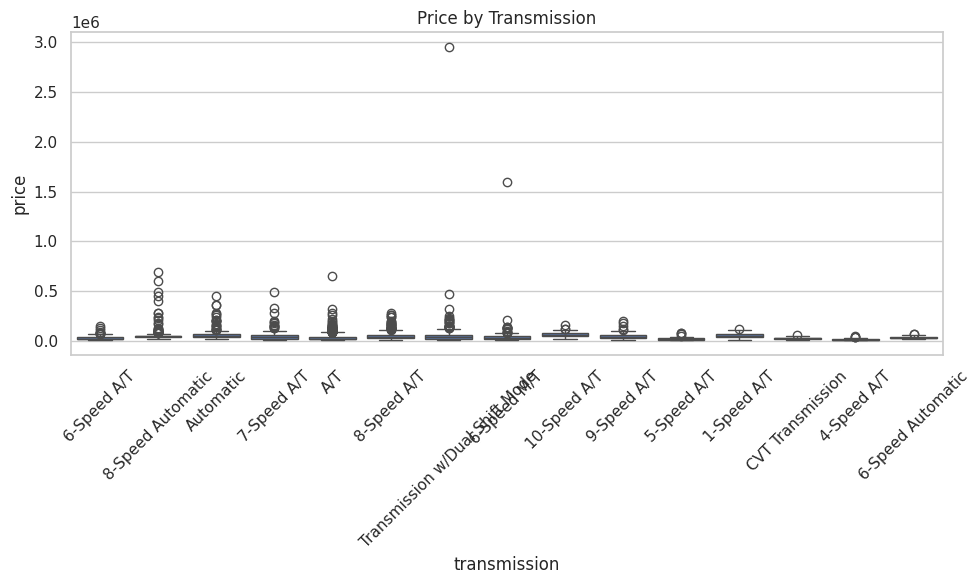

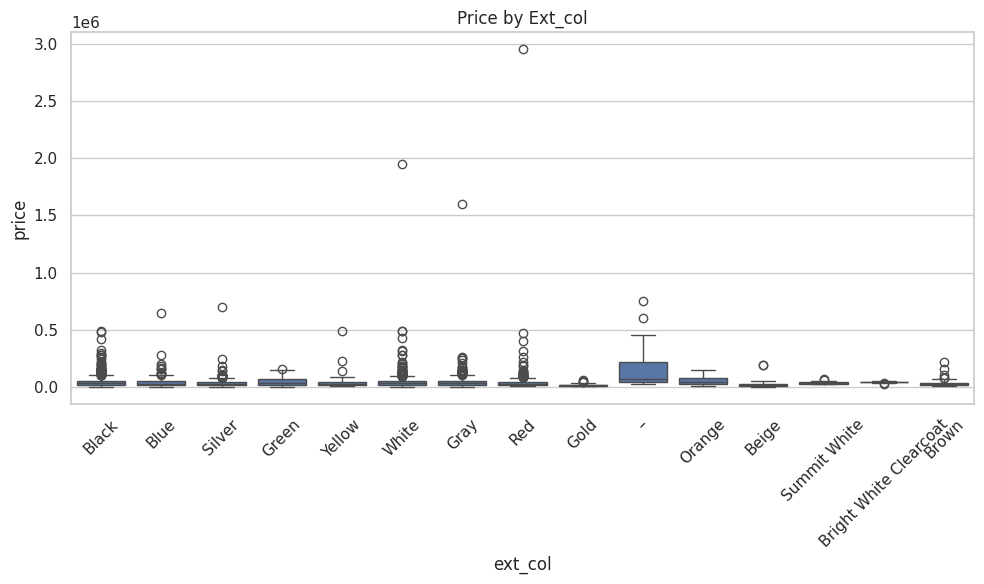

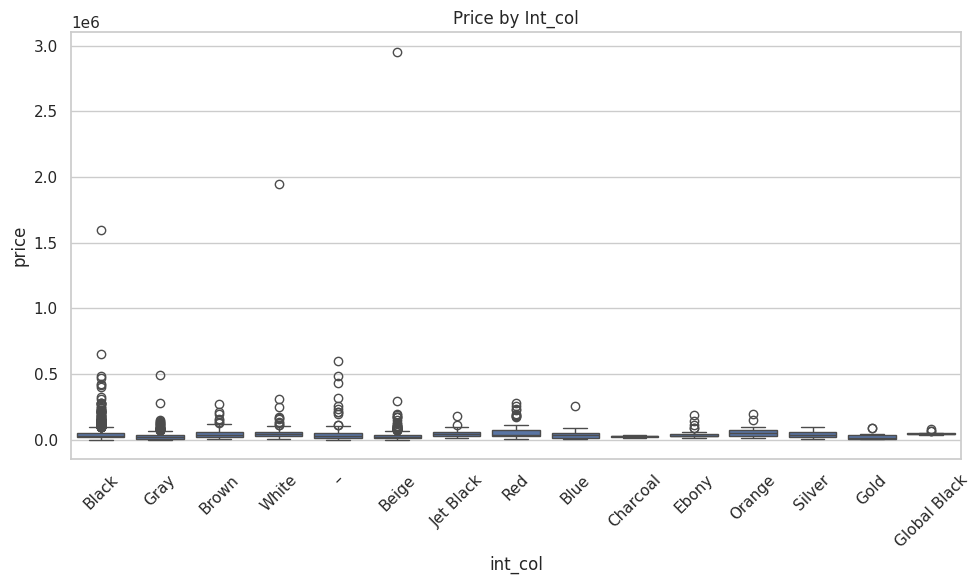

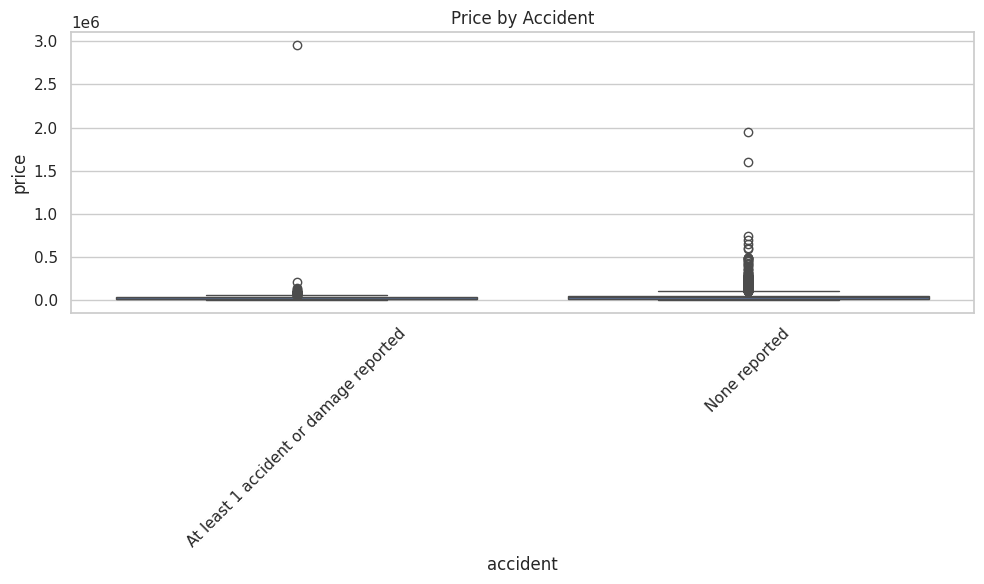

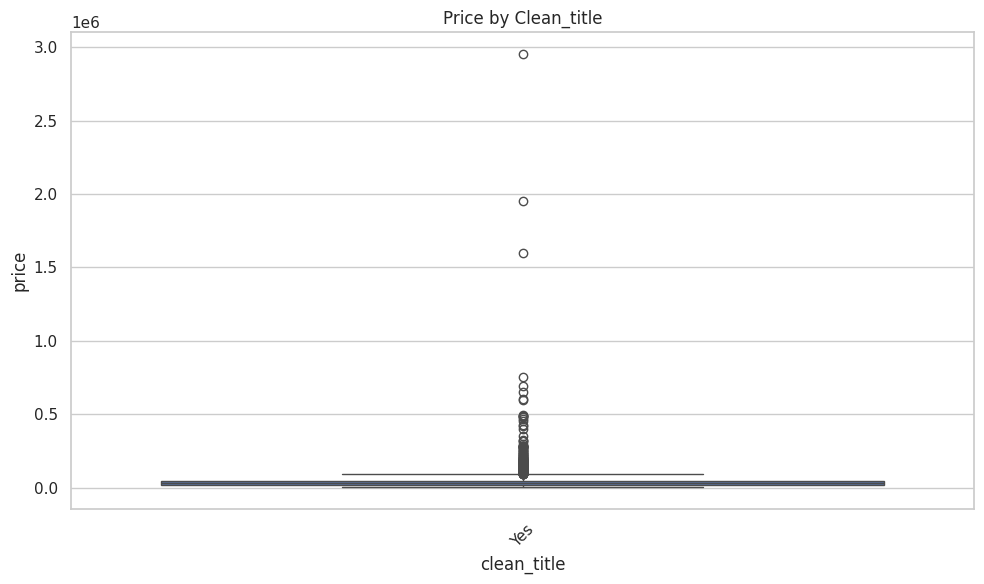

In [17]:
# visualize any correlation with categorical categories
for feature in categorical_features:
  plot_vs_price(used_cars_df, feature, 'price')

In [8]:
# function to extract horsepower and displacement from engine attribute
def extract_attributes(engine):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine)

    return horsepower.group(1) if horsepower else '', displacement.group(1) if displacement else ''

In [9]:
# create horsepower column and float values
used_cars_df[['horsepower', 'engine_displacement']] = used_cars_df['engine'].apply(extract_attributes).apply(pd.Series)
used_cars_df['horsepower'] = pd.to_numeric(used_cars_df['horsepower'], errors = 'coerce')

# calculate age of car from model year
curr_year = datetime.date.today().year
used_cars_df['age'] = curr_year - used_cars_df['model_year']

# move columns
horsepow = used_cars_df.pop("horsepower")
used_cars_df.insert(1, "horsepower", horsepow)
displ = used_cars_df.pop("engine_displacement")
used_cars_df.insert(2, "engine_displacement", displ)
age = used_cars_df.pop("age")
used_cars_df.insert(4, "age", age)

# drop columns now that we extracted useful information
used_cars_df.drop('engine', axis=1, inplace=True)
used_cars_df.drop('model_year', axis=1, inplace=True)

In [20]:
# check which columns have null values
used_cars_df.isna().sum()

brand                    0
horsepower             810
engine_displacement      0
model                    0
age                      0
milage                   0
fuel_type              170
transmission             0
ext_col                  0
int_col                  0
accident               113
clean_title            596
price                    0
dtype: int64

In [10]:
# replacing null values with some statistic in order to maintain size of dataset (bcuz its already kind of small)

# fuel_type: replace null with mode (most occuring) value
mode_fuel_type = used_cars_df['fuel_type'].value_counts().idxmax()
used_cars_df['fuel_type'].fillna(mode_fuel_type, inplace = True)
used_cars_df['fuel_type'].replace('–', 'Electric', inplace = True)
used_cars_df['fuel_type'].replace('not supported', 'Electric', inplace = True)

# clean_title and accident: just drop nulls (not many options)
used_cars_df.dropna(subset = ['clean_title', 'accident'], axis = 0, inplace = True)

# horsepower: replace null with mean value
used_cars_df['horsepower'].fillna(used_cars_df['horsepower'].mean(), inplace = True)

# engine displacement: convert from string to float, fill null values with mean
used_cars_df['engine_displacement'] = used_cars_df['engine_displacement'].str.replace('L', '')
used_cars_df['engine_displacement'] = pd.to_numeric(used_cars_df['engine_displacement'], errors = 'coerce')
used_cars_df['engine_displacement'].fillna(used_cars_df['engine_displacement'].mean(), inplace = True)

In [22]:
# drop columns that don't help / are not explanatory
# clean_title has 1 unique value; accident has 2 uncorrelated => both not helpful
cols_to_drop = ['clean_title', 'accident']
used_cars_df.drop(cols_to_drop, axis = 1, inplace = True)

In [23]:
used_cars_df.head(n=5)

,brand,horsepower,engine_displacement,model,age,milage,fuel_type,transmission,ext_col,int_col,price
0,Ford,300.000000,3.7,Utility Police Interceptor Base,11,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,10300.0
1,Hyundai,331.445122,3.8,Palisade SEL,3,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,38005.0
3,INFINITI,354.000000,3.5,Q50 Hybrid Sport,9,88900.0,Hybrid,7-Speed A/T,Black,Black,15500.0
6,Audi,292.000000,2.0,S3 2.0T Premium Plus,7,84000.0,Gasoline,6-Speed A/T,Blue,Black,31000.0
7,BMW,282.000000,4.4,740 iL,23,242000.0,Gasoline,A/T,Green,Green,7300.0


### Pre-processing the data

**Section Description:** Want to format the data so that it is compatible to run a regression on. This inlcudes encoding categorical variables to numerical.

In [11]:
# label encode non-numerical categories in relation to price column
categories = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col']

# regularized to prevent overfitting used cars
encoder = ce.TargetEncoder(cols=categories, smoothing=10, min_samples_leaf=5)
df_encoded = encoder.fit_transform(used_cars_df[categories], used_cars_df['price'])

used_cars_df['brand_encoded'] = df_encoded['brand']
used_cars_df['model_encoded'] = df_encoded['model']
used_cars_df['fuel_type_encoded'] = df_encoded['fuel_type']
used_cars_df['transmission_encoded'] = df_encoded['transmission']
used_cars_df['ext_col_encoded'] = df_encoded['ext_col']
used_cars_df['int_col_encoded'] = df_encoded['int_col']


In [12]:
used_cars_df.head(n=10)

,brand,horsepower,engine_displacement,model,age,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,brand_encoded,model_encoded,fuel_type_encoded,transmission_encoded,ext_col_encoded,int_col_encoded
0,Ford,300.000000,3.700000,Utility Police Interceptor Base,11,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,34172.233618,27733.751791,22119.456470,25252.872881,39494.453125,41951.396463
1,Hyundai,331.445122,3.800000,Palisade SEL,3,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,18388.077710,37893.248195,42161.433930,93798.730002,40237.739936,26759.391403
3,INFINITI,354.000000,3.500000,Q50 Hybrid Sport,9,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,21943.522489,31206.205727,49021.318079,47571.348241,39494.453125,41951.396463
6,Audi,292.000000,2.000000,S3 2.0T Premium Plus,7,84000.0,Gasoline,6-Speed A/T,Blue,Black,None reported,Yes,31000.0,34424.810748,35144.892119,42161.433930,25252.872881,38085.957317,41951.396463
7,BMW,282.000000,4.400000,740 iL,23,242000.0,Gasoline,A/T,Green,Green,None reported,Yes,7300.0,37542.046729,27915.444540,42161.433930,31200.125123,44595.260992,39139.037768
8,Lexus,311.000000,3.500000,RC 350 F Sport,3,23436.0,Gasoline,6-Speed A/T,Black,Black,None reported,Yes,41927.0,32845.922591,41811.686933,42161.433930,25252.872881,39494.453125,41951.396463
9,Tesla,534.000000,3.723119,Model X Long Range Plus,4,34000.0,Gasoline,A/T,Black,Black,None reported,Yes,69950.0,48768.916953,53699.326826,42161.433930,31200.125123,39494.453125,41951.396463
11,Aston,715.000000,5.200000,Martin DBS Superleggera,5,22770.0,Gasoline,8-Speed A/T,Silver,Black,None reported,Yes,184606.0,89849.040460,122821.649266,42161.433930,50530.294118,32065.743516,41951.396463
12,Toyota,382.000000,3.000000,Supra 3.0 Premium,3,12500.0,Gasoline,A/T,Yellow,Black,None reported,Yes,53500.0,28332.111939,46755.802491,42161.433930,31200.125123,50866.951409,41951.396463
13,Lincoln,400.000000,3.000000,Aviator Reserve AWD,2,18196.0,Gasoline,Transmission w/Dual Shift Mode,Black,Brown,None reported,Yes,62000.0,26235.633552,49867.229531,42161.433930,54031.565553,39494.453125,45294.865925


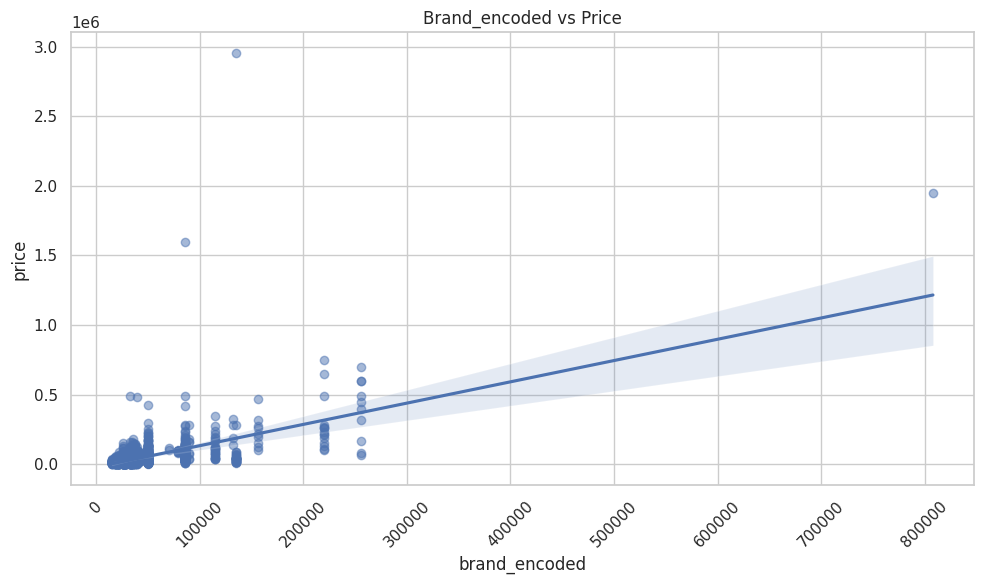

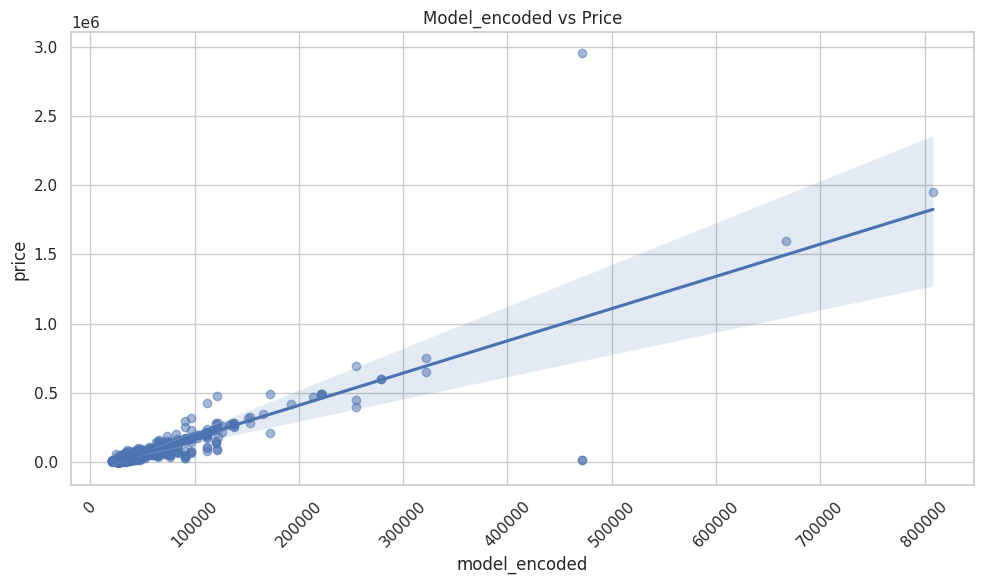

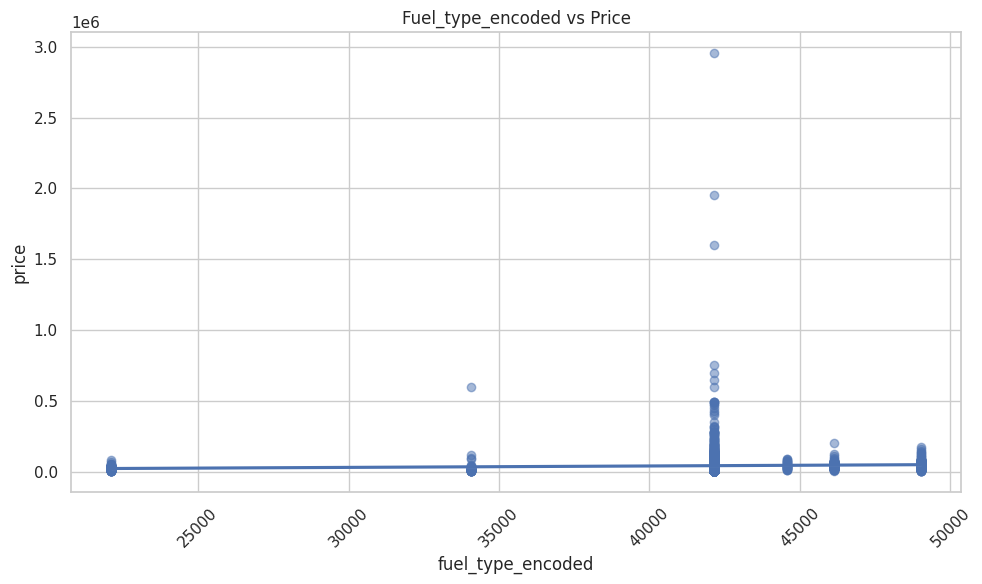

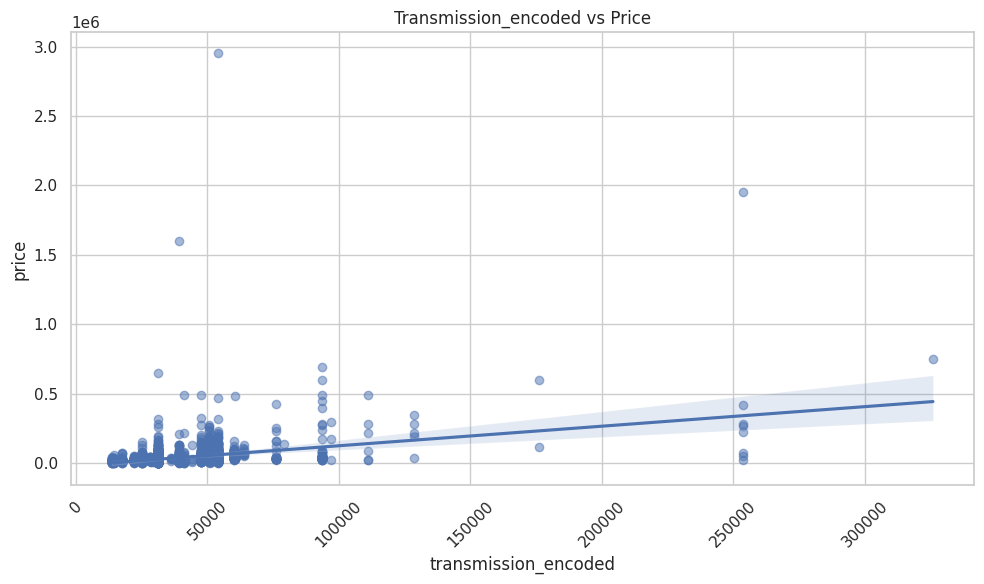

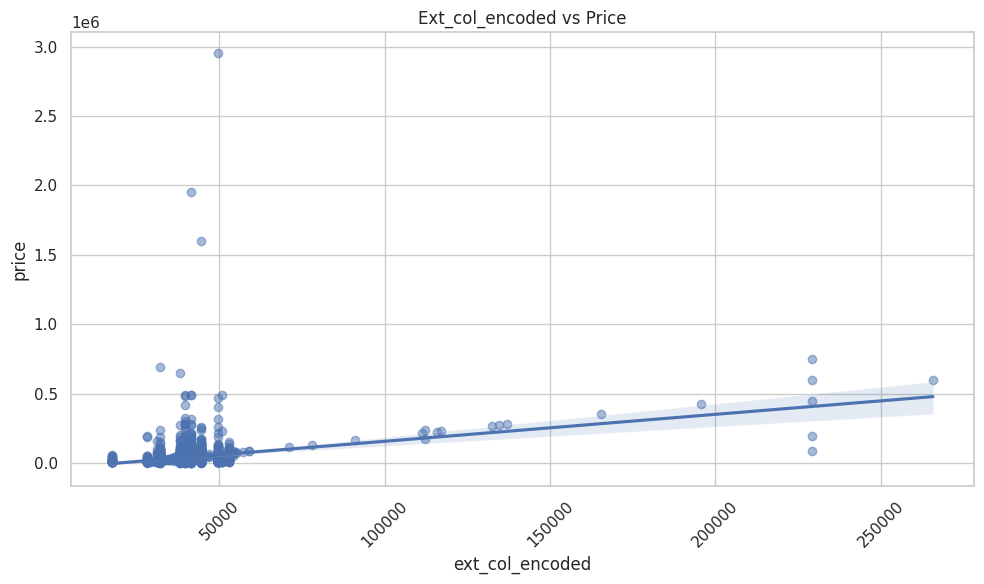

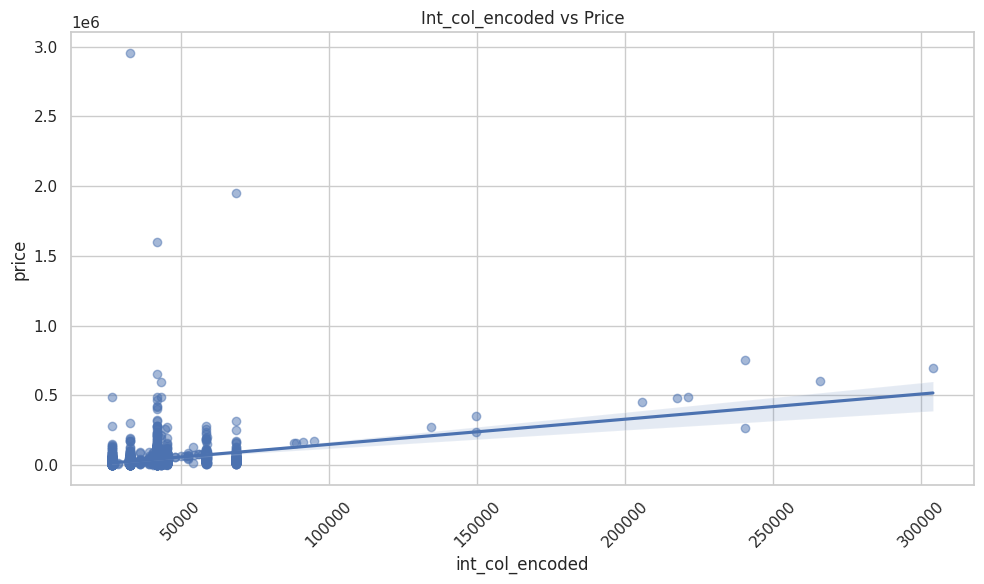

In [17]:
# visualize any correlation with categories
encoded_categories = ['brand_encoded', 'model_encoded', 'fuel_type_encoded', 'transmission_encoded', 'ext_col_encoded', 'int_col_encoded']
for feature in encoded_categories:
  plot_vs_price(used_cars_df, feature, 'price')

### Models

**Section Description:** Define our regression models. Train, validate, and test them on different folds of the dataset.

#### Splitting the data into train, val, and test

In [26]:
# features / predictors
feat = ['brand_encoded', 'model_encoded', 'fuel_type_encoded', 'transmission_encoded', 'ext_col_encoded', 'int_col_encoded', 'age', 'milage', 'horsepower', 'engine_displacement']
X = used_cars_df[feat]

# labeled outcome / what we are trying to predict
y = used_cars_df['price']

# convert to numpy array
X = X.to_numpy()
y = y.to_numpy()

In [27]:
# shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(X.shape[0])

# choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * X.shape[0])
val_split_idx = int(0.90 * X.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# select the examples from x and y to construct our training, validation, testing sets
X_train, y_train = X[train_indices, :], y[train_indices]
X_val, y_val = X[val_indices, :], y[val_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

#### Sci-kit Linear Regression Model

In [28]:
# training the model
model_scikit = LinearRegressionSciKit(fit_intercept=False)
model_scikit.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [29]:
# test model on training set
predictions_train_scikit = model_scikit.predict(X_train)

# test model on validation set
predictions_val_scikit = model_scikit.predict(X_val)

# test model on testing set
predictions_test_scikit = model_scikit.predict(X_test)

#### Our own implementation of Sci-kit Linear Regression Model

In [30]:
# TODO: Implement Linear Regression Class Here

class LinearRegression(object):

    def __init__(self):
        # Define private variables
        self.__weights = None

    def __fit_normal_equation(self, X_data, y_data):
        '''
        Fits the model to x and y via normal equation
        Arg(s):
            X : numpy
                N x d feature vector
            y : numpy
                N x 1 ground-truth label
        '''

        # w* = (X^T X)^-1 X^T y
        # print(X_data.shape, y_data.shape)
        XT_X = np.matmul(X_data.T, X_data)
        #d x N N x d => dxd

        #  (X^T X)^-1
        XT_X_inverse = np.linalg.inv(XT_X)
        #Still dxd

        # w* = (X^T X)^-1 X^T y
        # should be dxd dxn nx1 = dx1 for weights
        self.__weights = np.matmul(np.matmul(XT_X_inverse, X_data.T), y_data)


    def fit(self, x, y):
        '''
        Fits the model to x and y by solving the ordinary least squares
        using normal equation

        Arg(s):
            x : numpy[float32]
                N x d feature vector
            y : numpy[float32]
                N x 1 ground-truth label
        '''

        # X = x.T
        # y = y.T
        self.__fit_normal_equation(x, y)

    def predict(self, x):
        '''
        Predicts the real value for each feature vector x

        Arg(s):
            x : numpy[float32]
                d x N feature vector
        Returns:
            numpy[float32] : d x 1 real value vector (\hat{y})
        '''
        # x initially is Nxd so transpose it so dimensions match
        # y_hat = w.T x

        return np.matmul(self.__weights, x.T)

### Predicting Using Our Linear Regression Model

In [31]:
model_ours = LinearRegression()

model_ours.fit(X_train, y_train)
# test model on training set
predictions_train_ours = model_ours.predict(X_train)

# test model on validation set
predictions_val_ours = model_ours.predict(X_val)

# test model on testing set
predictions_test_ours = model_ours.predict(X_test)

### Model Performance

**Section Description:** Test performance of model using mean squared error (MSE) and $R^2$ score.

In [32]:
# measure MSE and R^2
def test_performance(y, predictions, dataset):
  score_mse_train = skmetrics.mean_squared_error(y, predictions)
  print(f'{dataset} set mean squared error: {score_mse_train:.4f}')

  score_r2_train = skmetrics.r2_score(y, predictions)
  print(f'{dataset} set r-squared scores: {score_r2_train:.4f}')

  print()

In [33]:
print("TESTING MODEL SCIKIT LINEAR REGRESSION")
print("--------------------------------------")
test_performance(y_train, predictions_train_scikit, 'Training')
test_performance(y_val, predictions_val_scikit, 'Validation')
test_performance(y_test, predictions_test_scikit, 'Testing')

print("TESTING OUR LINEAR REGRESSION MODEL")
print("-----------------------------------")
test_performance(y_train, predictions_train_ours, 'Training')
test_performance(y_val, predictions_val_ours, 'Validation')
test_performance(y_test, predictions_test_ours, 'Testing')

TESTING MODEL SCIKIT LINEAR REGRESSION
--------------------------------------
Training set mean squared error: 2366435730.9726
Training set r-squared scores: 0.6500

Validation set mean squared error: 158036484.3031
Validation set r-squared scores: 0.9598

Testing set mean squared error: 341257532.2919
Testing set r-squared scores: 0.9591

TESTING OUR LINEAR REGRESSION MODEL
-----------------------------------
Training set mean squared error: 2366435730.9726
Training set r-squared scores: 0.6500

Validation set mean squared error: 158036484.3031
Validation set r-squared scores: 0.9598

Testing set mean squared error: 341257532.2919
Testing set r-squared scores: 0.9591



In [34]:
# plot predicted (y_hat) vs real values (y)
def plot_predictions(y, predictions):
  sns.set_theme(style="whitegrid")
  plt.figure(figsize=(10, 6))
  sns.distplot(y, hist=False, color="r", label="Actual Value")
  sns.distplot(predictions, hist=False, color="b", label="Fitted Values")
  plt.title('Actual vs Fitted Values (Price)')
  plt.xlabel('Price')
  plt.ylabel('# of Cars')
  plt.show()
  plt.close()

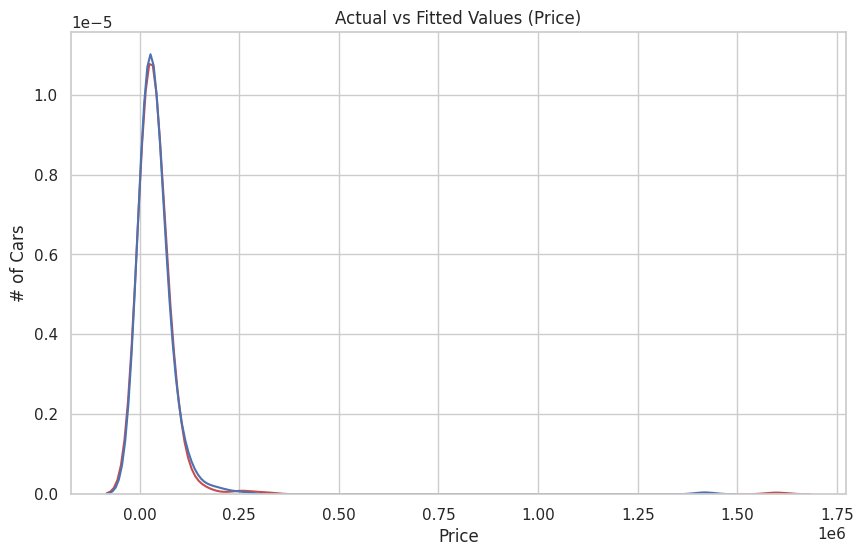

In [36]:
plot_predictions(y_test, predictions_test_scikit)

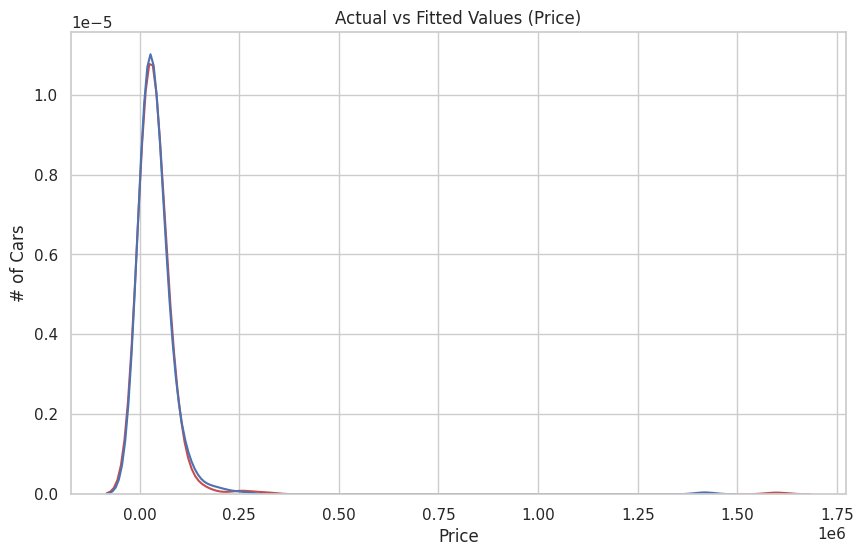

In [38]:
plot_predictions(y_test, predictions_test_ours)

### Exporting Model and Encoder for Web App

In [39]:
file_path = '/content/drive/MyDrive/Colab Notebooks/MATH 222: Linear Algebra'
joblib.dump(model_scikit, file_path + '/content/regression_model.pkl')
joblib.dump(encoder, file_path + '/content/target_encoder.pkl')

['/content/drive/MyDrive/Colab Notebooks/MATH 222: Linear Algebra/content/target_encoder.pkl']